# Advanced Python: PCA, UMAP and clustering

<center>
<img src="../pictures/seurat_seascape.jpg" style="width:465px;height:375px;">
<br>
<i>Seascape at Port-en-Bessin, Normandy (1888, Georges Seurat)</i>
</center>

In the previuos session, we have seen PCA as a dimensionality reduction technique. Today, we will review PCA and introduce UMAP, another (more complex) dimensionality reduction method.

In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# load dataset
from sklearn.datasets import load_digits
digits = load_digits()
digits_data = digits.data
digits_target = digits.target

# standardize (demean + scale) the data
scaler = StandardScaler()
digits_data_scaled = scaler.fit_transform(digits_data)

# apply PCA
pca = PCA()
digits_data_pca = pca.fit_transform(digits_data_scaled)

Generally, there are a few things we care about after we perform PCA:
1. How many PCs do we need to explain a certain amount of *variance*?
2. Is there something interesting about the *PC*s?
   - Are the PCs correlated with some of the original features?
3. What are the *loadings*? i.e. What do our data look like in the PC space?

### Exercises:
1. Visualize the digits dataset in terms of the first 2 PCs. 
    > Plot each samples loading/projection onto the first 2 PCs.
    1. What do you see?
    2. Are there any clusters?
2. What do the first 2 PCs look like?

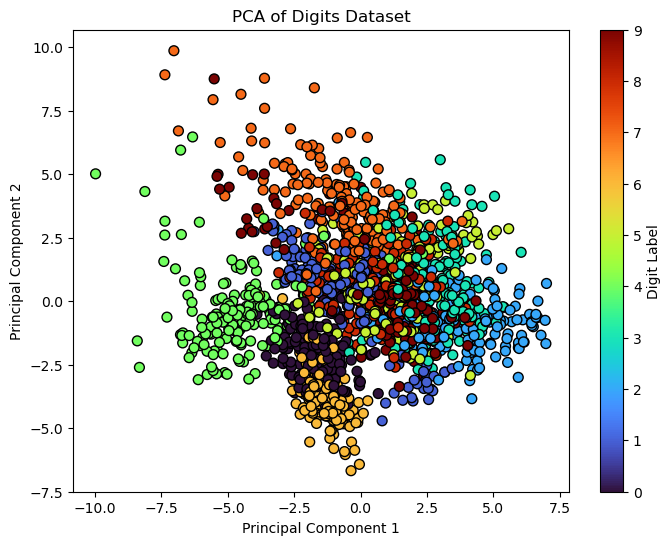

In [4]:
pc_i, pc_j = 0, 1 # indices of the PCs to plot

plt.figure(figsize=(8, 6))
# plot the loadings of the PCs of our choice
s = plt.scatter(digits_data_pca[:, pc_i], digits_data_pca[:, pc_j], 
                c=digits_target, cmap='turbo', edgecolor='k', s=50)

# prettify the plot
plt.xlabel(f"Principal Component {pc_i + 1}")
plt.ylabel(f"Principal Component {pc_j + 1}")
plt.title("PCA of Digits Dataset")
# make colorbar for scatter plot
plt.colorbar(s, label="Digit Label")


Text(0.5, 1.0, 'PC 2')

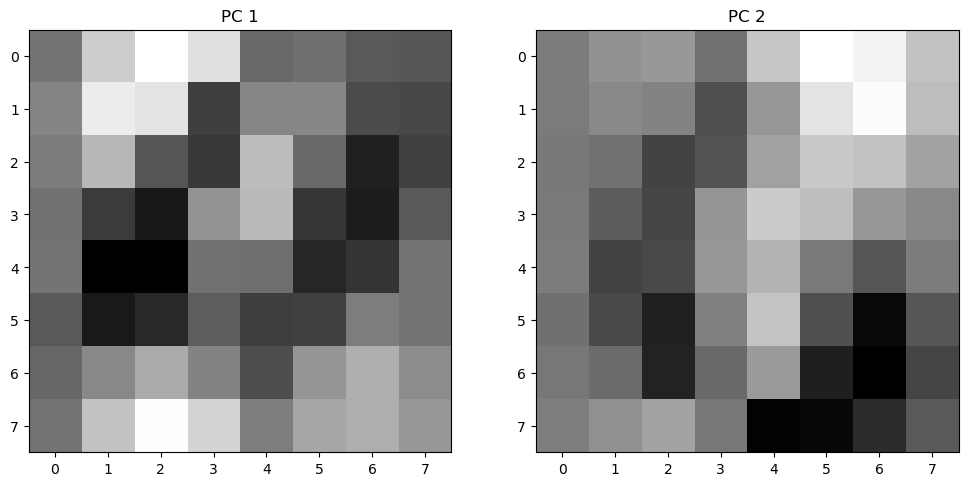

In [5]:
plt.subplots(1, 2, figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(pca.components_[pc_i].reshape(8, 8), cmap='gray')
plt.title(f"PC {pc_i + 1}")

plt.subplot(1, 2, 2)
plt.imshow(pca.components_[pc_j].reshape(8, 8), cmap='gray')
plt.title(f"PC {pc_j + 1}")

### Enter UMAP (Uniform Manifold Approximation and Projection)

In [6]:
import umap

In [7]:
reducer = umap.UMAP(n_neighbors=5, min_dist=0.5, n_components=2)
embedding = reducer.fit_transform(digits.data)

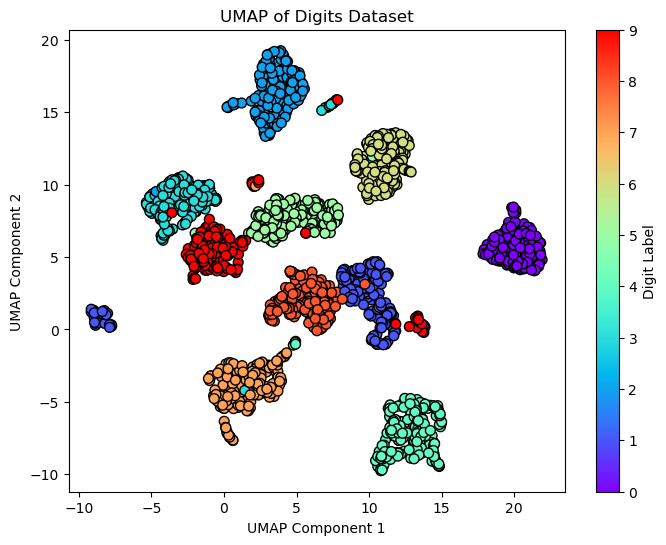

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits_target, cmap='rainbow', edgecolor='k', s=50)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP of Digits Dataset")
plt.colorbar(label="Digit Label")

### Exercises:
1. Check the UMAP documentation to see what the parameters (`n_neighbors`, `min_dist`, `n_components`) mean.
   1. You can vary the parameters and see if the changes make intuitive sense.
2. What are the pros and cons of UMAP compared to PCA?

### Clustering
Here, we introduce K-means clustering as an example of clustering algorithm. Clustering on top of some low-dimensional representations (e.g. PCA or UMAP) can be helpful to further illustrate the structure of the data.

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [10]:
# get the first 2 PCs
Xs = {"pca": digits_data_pca[:, :2], "umap": embedding}
labels_all = dict()

# run K-means clustering
for key, X in Xs.items():
    kmeans = KMeans(n_clusters=10, random_state=42)
    labels = kmeans.fit_predict(X)
    labels_all[key] = labels
    print("K-means clustering on", key)
    print("Adjusted Rand Index:", adjusted_rand_score(digits_target, labels))
    print("Silhouette Score:", silhouette_score(X, labels))
    print("\n")

K-means clustering on pca
Adjusted Rand Index: 0.3247933772749632
Silhouette Score: 0.3788052258187925


K-means clustering on umap
Adjusted Rand Index: 0.8918801798076208
Silhouette Score: 0.61587876




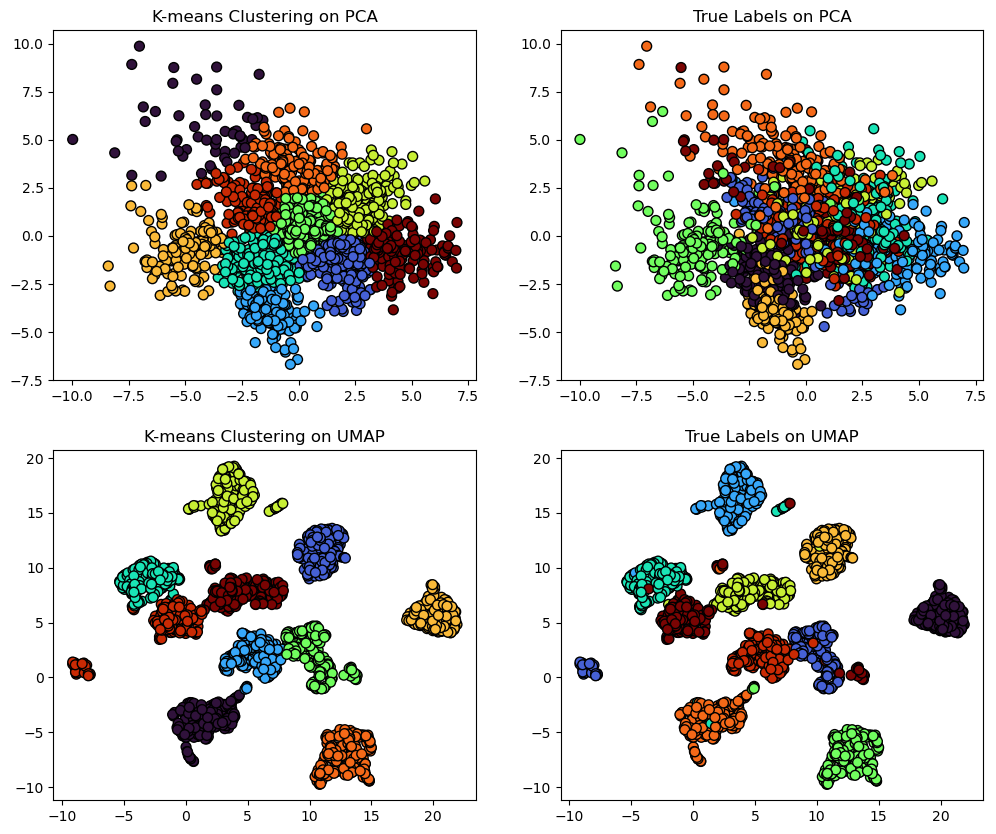

In [11]:
# check how well K-means did on PCA and UMAP
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, key in enumerate(Xs.keys()):
    X = Xs[key]
    labels = labels_all[key]

    axs[i, 0].scatter(X[:, 0], X[:, 1], c=labels, cmap='turbo', 
                   edgecolor='k', s=50)
    axs[i, 0].set_title(f"K-means Clustering on {key.upper()}")

    axs[i, 1].scatter(X[:, 0], X[:, 1], c=digits_target, cmap='turbo',
                   edgecolor='k', s=50)
    axs[i, 1].set_title(f"True Labels on {key.upper()}")
